CREDIT CARD FRAUD DETECTION

Credit card fraud is a growing concern in the digital economy,where millions of financial transactions occur every day.Fraud Transactions can cause financial losses.This project focuses on building a machine learning model that can accurately identify fraud credit card transaction.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'C:\Users\mohanan\Desktop\creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data.shape

(284807, 31)

In [7]:
data['Class'].value_counts(normalize=True)*100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# Checking Null values

data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
data.duplicated().sum()

1081

In [11]:
data=data.drop_duplicates()

In [12]:
data.shape

(283726, 31)

EDA

In [13]:
print(data['Class'].value_counts())

Class
0    283253
1       473
Name: count, dtype: int64


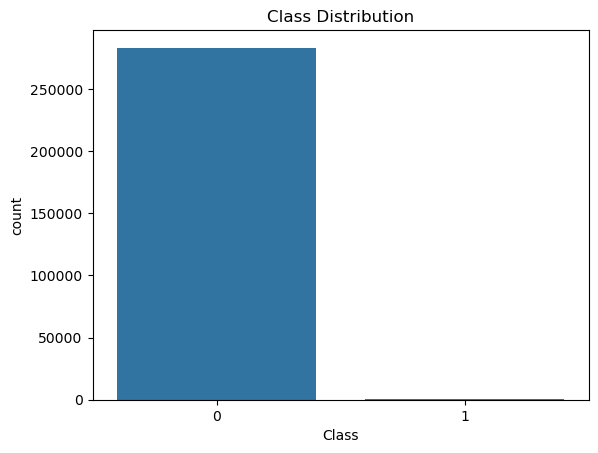

In [14]:
sns.countplot(data=data,x='Class')
plt.title('Class Distribution')
plt.show()

Insight:We can seee the fraud class freequency is very low 

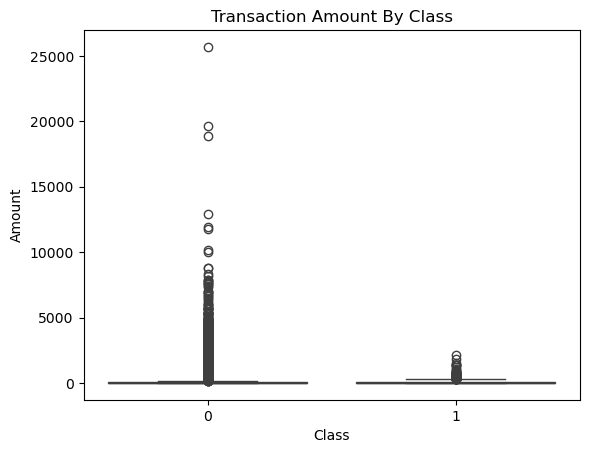

In [15]:
#Understand how fraud and normal transactions differ in monetary value

sns.boxplot(x='Class',y='Amount',data=data)
plt.title("Transaction Amount By Class")
plt.show()
            

Insight:The Transaction amount in non fraud class is high where as low in fraud class

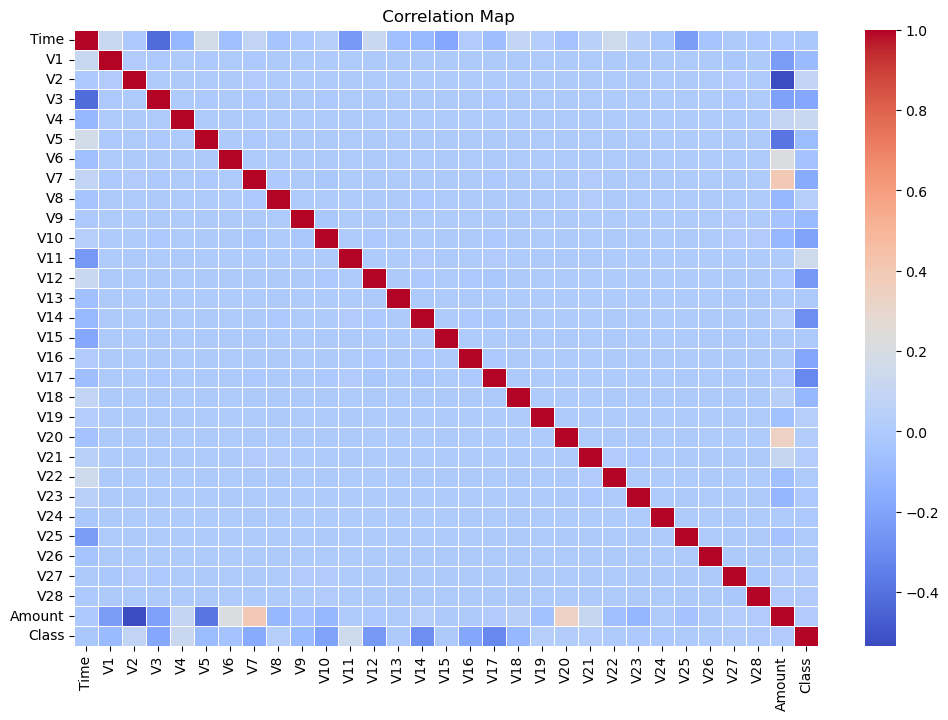

In [16]:
#Corelation

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),cmap='coolwarm',linewidths=0.5)
plt.title(" Correlation Map")
plt.show()

Most Of the features are uncorrelated, 
Amount has weak correlation

In [17]:
#Drop unncessary column
data=data.drop(['Time'],axis=1)

In [18]:
#Scaling 
std_scaler=StandardScaler()
data['Amount']=std_scaler.fit_transform(data[['Amount']])

In [19]:
X=data.drop('Class',axis=1)
y=data['Class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [20]:
#The dataset is Imbalanced that is  Very high no of  non fraud and very low no of  fraud transactions  
#Handling Imbalanced Data Using SMOTE

from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_train_sm,y_train_sm=smote.fit_resample(X_train,y_train)

In [21]:
print('After smote')
print(pd.Series(y_train_sm).value_counts())

After smote
Class
0    226602
1    226602
Name: count, dtype: int64


In [22]:
#Train Model
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_sm,y_train_sm)
y_pred_lr=lr.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
#from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix

In [24]:
print("Classification Report")
print(classification_report(y_test,y_pred_lr))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_lr))


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.87      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.92      0.54     56746
weighted avg       1.00      0.97      0.99     56746

Confusion Matrix
[[55181  1470]
 [   12    83]]


In [25]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,random_state=42,n_jobs=-1)
rf.fit(X_train_sm,y_train_sm)
y_pred_rf=rf.predict(X_test)

In [26]:
print("Classification Report")
print(classification_report(y_test,y_pred_rf))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_rf))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.88      0.77      0.82        95

    accuracy                           1.00     56746
   macro avg       0.94      0.88      0.91     56746
weighted avg       1.00      1.00      1.00     56746

Confusion Matrix
[[56641    10]
 [   22    73]]


In [27]:
from xgboost import XGBClassifier
xgb=XGBClassifier(use_label_encoder=False,eval_metric='logloss')
xgb.fit(X_train_sm,y_train_sm)
y_pred_xgb=xgb.predict(X_test)

In [28]:
print("Classification Report")
print(classification_report(y_test,y_pred_xgb))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_xgb))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.70      0.80      0.75        95

    accuracy                           1.00     56746
   macro avg       0.85      0.90      0.87     56746
weighted avg       1.00      1.00      1.00     56746

Confusion Matrix
[[56619    32]
 [   19    76]]


CONCLUSION
In this project,I built and evaluate machine learning models to detect fraudulent credit card transactions using a highly imbalanced dataset.The dataset consisted of anonymized features(V1 to V8) along with transaction amount and the target variable Class(0:Non Fraud,1:Fraud)
Steps Taken:
  Performed Exploratory Data analysis and visualized data distribution
  Used SMOTE to balance the training set and address class imbalance
  Trained 3 Classification Models:
    1.Logistic regression
    2 Random Forest Classifier
    3 XGBoost Classifier
Evaluation Metrics Used :
  Accuracy,Precision,Recall,F1Score,confusion Matrix
Key Findings:
  Random Forest Performed the best over all with a good balance between precision and recall
  Logistic Regression struggled with high no of false positive (predicted too many transactions as fraud)
  XGBoost performed slightly worse than RF better than LR
Conclusion
 Random Forest is the most suitable model for this datasetshowing high precision 
